# Week 7 - APIs

**Optional Reading:** Data Wrangling with Python, Chapter 13 (pages 361 - 375)
<img align="right" style="padding-right:10px;" src="figures_7/Data_Wrangling_Book.jpg" ><br>

**Overview:**<br>

* Application Programming Interface (API)

  * What is an API?
  * Who creates APIs?
  * When would I use an API?
    
* Use Case: REST API

  * NASA: Astronomy Picture of the Day (APOD)
     * APOD: Current Day
     * APOD: Specific Day
     
* Use Case: Streaming API

  * Twitter's streaming API
     * Specific number of 'live tweets'
     * Streaming of Twitter data   

# Application Programming Interface (API)

An application programming interface (API) is "a set of protocols used by programmers to create applications for a specific operating system or to interface between the different modules of an application." <br> 
https://www.dictionary.com

It sounds complicated and complex based on that definition, but it is not.


## What is an API?
In basic terms, APIs allow applications to communicate with each other via the internet and governs access to information.
 
<img align="left" style="padding-right:10px;" src="figures_7/API-communication.png" ><br>
https://medium.com/@perrysetgo/what-exactly-is-an-api-69f36968a41f

## Who creates APIs?
"Large tech companies, especially social media companies frequently make their aggregate data available to the public, but APIs are also maintained by government organizations, conferences, publishing houses, software startups, fan groups, eSports leagues and even individuals, in order to share anything from social media content to trivia questions, rankings, maps, song lyrics, recipes, parts lists and more.

In short, any person or organization that collects data might have an interest in making that data available for use by a different app."

https://medium.com/@perrysetgo/what-exactly-is-an-api-69f36968a41f

## When would I use an API?
One of the most common APIs that students use to gain an understanding of how to work with an API is Twitter. 

Imagine that as a student; you are asked to complete an analysis of all the tweets mentioning #RegisUniversity. Twitter's internal systems store that information, but you do not have access to those systems. 

You have a couple of options at this point:
   * Search a variety of social media websites looking for an employee within Twitter and ask their help in retrieving this information for you to use.
   * Contact Twitter directly and request access to their systems.
   * Ask Twitter to send you a copy of the data you are looking for
   * Any number of less legal methods of obtaining your data
   
   <strong> OR </strong> <br><br>
   
   * You could use the API that Twitter provides for public use.  

# Use Case: REST API
There are different types of APIs. The most common type is known as a REST API. <b>REST</b> stands for <b>Re</b>presentational <b>S</b>tate <b>T</b>ransfer 

A REST API uses the HTTP requests to GET, PUT, POST and DELETE data. 

## NASA: Astronomy Picture of the Day (APOD)
NASA releases a lot of data to the general public, including an Astronomy Picture of the Day (APOD). To get the picture you need to issue an HTTP GET request and parse the JSON that is returned. 

This task is made easier with the requests package. Although requests is not standard in python3, it is becoming a standard package in industry.

### APOD: Current Day

<div class="alert alert-block alert-success">
<b>Installation - requests</b> <br>
    pip install requests 
</div>

In [12]:
import requests

Using the requests package is very easy. 

For example, NASA gives us an example URL with a demo security key that can be used to query the APOD interface. 
Generally speaking, the creator of an API will require individuals to register and receive their own credentials to use their API. Given the popularity of the APOD API, NASA has provided the public with a guest credential, 'DEMO_KEY' to view 30 images (based on ip address) each day.  of 'DEMO_KEY'. 

The request url, at this point, would look like: https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY

Everything after the '?' is a variable and its associated value. In this case, NASA expects a variable called "api_key" which we will supply the guest credential of 'DEMO_KEY'.

Many times these variables (or 'parameters') will come from user input and so should not be hard-coded. Below is an example of making a request, with the parameter(s) contained in a dictionary variable:

In [2]:
# building and sending our request
apiKey = {'api_key':'DEMO_KEY'}

# storing the results in a variable
result =  requests.get('https://api.nasa.gov/planetary/apod',params=apiKey)

The response that was returned from our request has specific attributes associated with it. Based on the documentation for APOD, the response will return the requesting url that was used. To look at the URL that was used in the original request.

In [3]:
print(result.url)

https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY


To look at the entire text of the response that was returned from our request.

In [4]:
print(result.text)

{"copyright":"Zhuokai Liu","date":"2019-12-05","explanation":"Beautiful spiral galaxy NGC 6744 is nearly 175,000 light-years across, larger than our own Milky Way. It lies some 30 million light-years distant in the southern constellation Pavo and appears as only a faint, extended object in small telescopes. We see the disk of the nearby island universe tilted towards our line of sight in this remarkably detailed galaxy portrait, a telescopic view that spans an area about the angular size of a full moon. In it, the giant galaxy's elongated yellowish core is dominated by the light from old, cool stars. Beyond the core, grand spiral arms are filled with young blue star clusters and speckled with pinkish star forming regions. An extended arm sweeps past a smaller satellite galaxy (NGC 6744A) at the lower right. NGC 6744's galactic companion is reminiscent of the Milky Way's satellite galaxy the Large Magellanic Cloud.","hdurl":"https://apod.nasa.gov/apod/image/1912/NGC6744_FinalLiuYuhang.j

Hmmm... That's a bit messy and hard to read.  Remember from above, we know that the response is JSON. Fortunately for us, JSON data can go straight into a dictionary. Requests can handle JSON data by calling json() function.

In [29]:
dict_current = result.json()

Let's get a list of all the keys in our JSON dictionary.

In [30]:
dict_current.keys()

dict_keys(['copyright', 'date', 'explanation', 'hdurl', 'media_type', 'service_version', 'title', 'url'])

Let's try to access several of the keys within our dictionary.

In [31]:
dict_current['date']

'2019-12-04'

In [32]:
dict_current['explanation']

"It may appear, at first, like the Galaxy is producing the lightning, but really it's the Earth. The featured nighttime landscape was taken from a southern tip of the Italian Island of Sardinia in early June. The foreground rocks and shrubs are near the famous Capo Spartivento Lighthouse, and the camera is pointed south toward Algeria in Africa.  In the distance, across the Mediterranean Sea, a thunderstorm is threatening, with several electric lightning strokes caught together during this 25-second wide-angle exposure.  Much farther in the distance, strewn about the sky, are hundreds of stars in the neighborhood of our Sun in the Milky Way Galaxy. Farthest away, and slanting down from the upper left, are billions of stars that together compose the central band of our Milky Way.   Free Lecture: APOD editor to speak in NYC on January 3"

So far so good, but we still haven't seen a picture. One would assume that "Picture of the Day" would have an actual picture associated with the data. 

After consulting the documentation for the APOD API on (https://github.com/nasa/apod-api/blob/master/README.md), we are able to determine that 'url' contains a link to the APOD.

In [9]:
dict_current['url']

'https://apod.nasa.gov/apod/image/1912/NGC6744_FinalLiuYuhang1024.jpg'

Time to actually view the picture. Notice that this url is pointing to a jpg image. Luckily for us, we have already seen how to view a jpg images during this course. 

In prior weeks, we used Image(filename = 'some_filename.jpg').  This week, we will be using Image() with a url.

<div class="alert alert-block alert-info">
<b>Be patient!</b> It might take a bit to get the picture to display
</div>

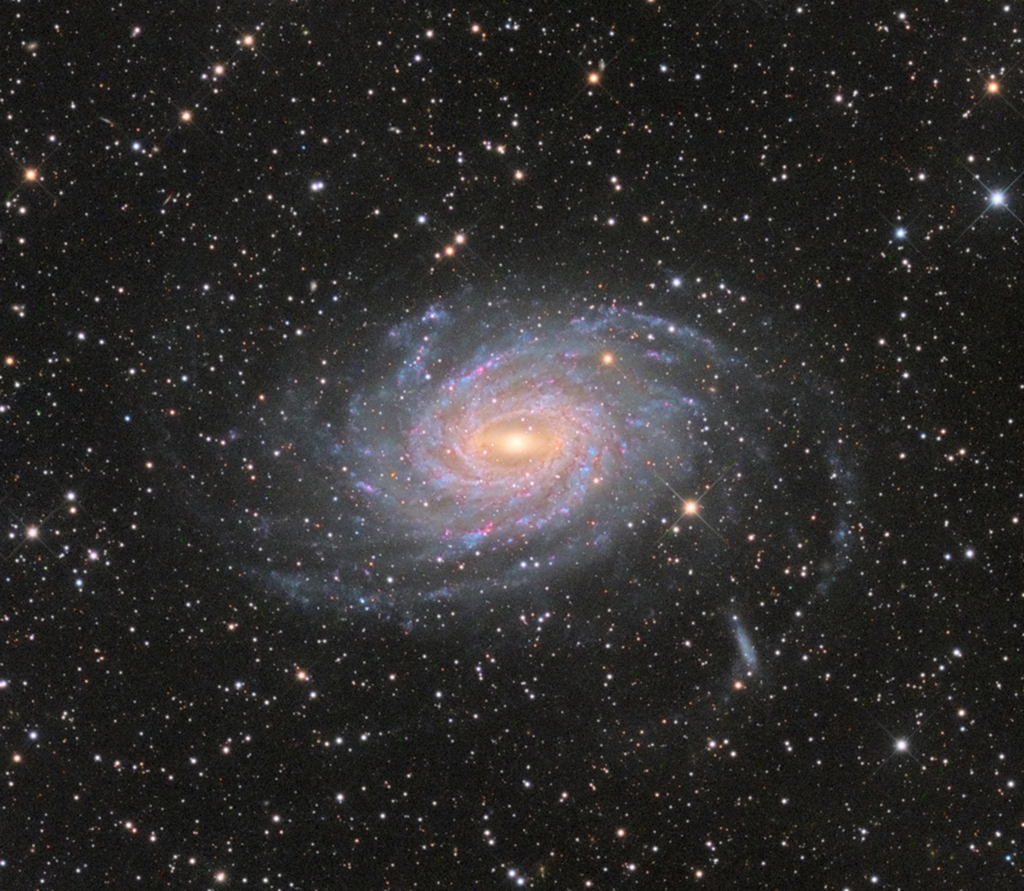

In [10]:
from IPython.display import Image

Image(dict_current['url'])

### APOD: Specific Day

By changing the values that we used in our original request, we should be able to view a APOD for a specific date.  

The documentation on NASA's API page (https://api.nasa.gov/) details the query parameters for the APOD API.

<img align="left" style="padding-right:10px;" src="figures_7/APOD-parameters.png" ><br>


Let's try using the datetime package within python and the above information to get different pictures.

In [11]:
import datetime
now = datetime.datetime.now()
print(now.date())

2019-12-05


To get a different day/week/month, etc. we can use the timedelta() function:

In [12]:
yesterday = now - datetime.timedelta(days = 1)
print(yesterday.date())

2019-12-04


So, to get yesterday's picture:

In [13]:
# using a dictionary for the query parameters
data = {'api_key':'DEMO_KEY', 'date':yesterday.date()}
data

{'api_key': 'DEMO_KEY', 'date': datetime.date(2019, 12, 4)}

In [14]:
# using the paramas argument in our request
result =  requests.get('https://api.nasa.gov/planetary/apod',params=data)

# create a dictionary for yesterday's picture
dict_yesterday = result.json()

# verify the date
print(dict_yesterday['date'])

2019-12-04


Viewing yesterday's picture

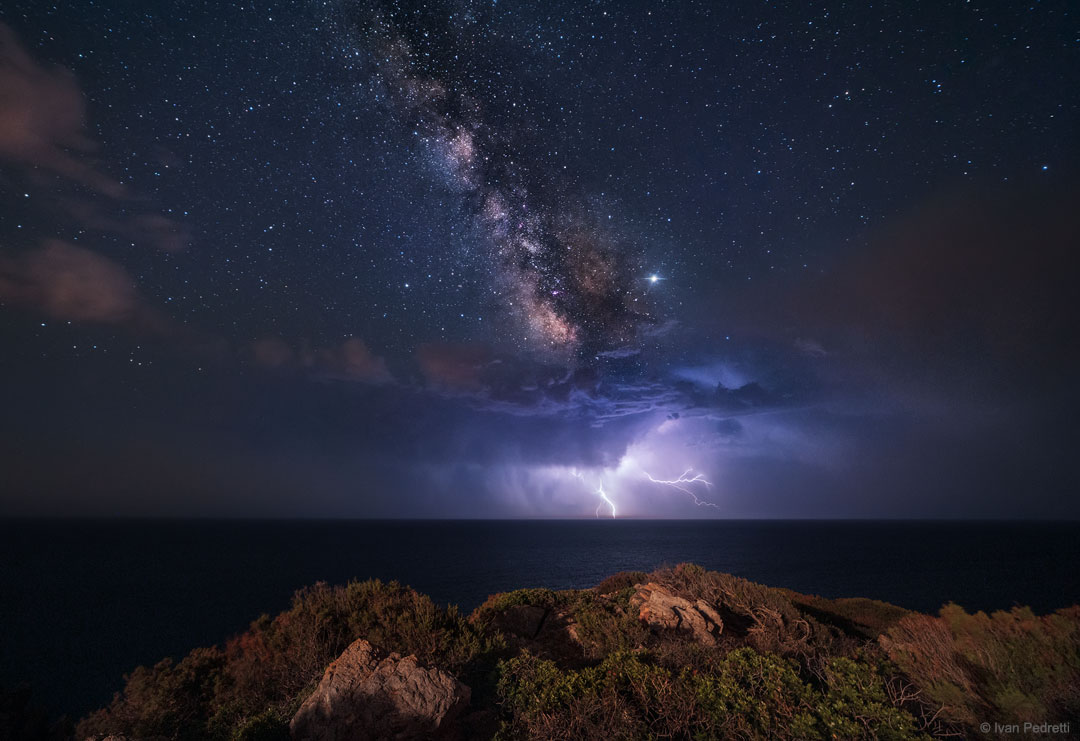

In [15]:
Image(dict_yesterday['url'])

Okay, one more, how about we get the picture from a specific date. Let's use Jan 01, 2015.

<div class="alert alert-block alert-warning">
<b>Note:</b> There are some dates that do not have a APOD, if the date you choose isn't available NASA will return the APOD for the current date. https://apod.nasa.gov/apod/archivepix.html has a list of the dates with available pictures.
</div>

We need to make a <strong>date</strong> object to pass to the APOD API.

In [16]:
# datetime format is yyyy-mm-dd
my_date = datetime.date(int('2015'),int('01'),int('01'))
my_date

datetime.date(2015, 1, 1)

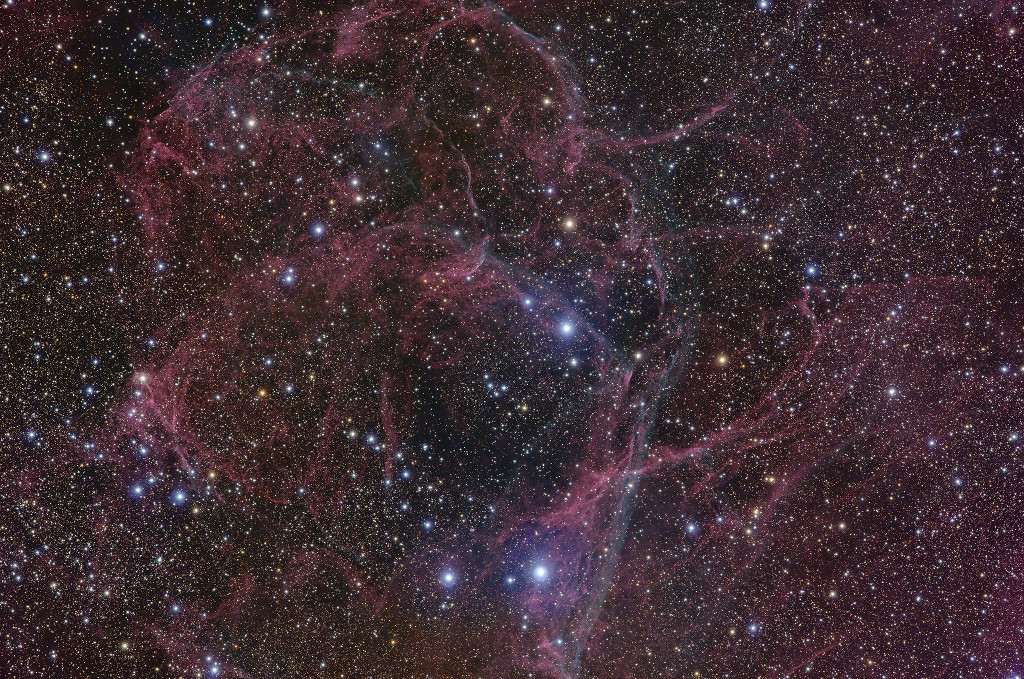

In [17]:
# same process as above
data = {'api_key':'DEMO_KEY', 'date': my_date}
results =  requests.get('https://api.nasa.gov/planetary/apod',params=data)
dict_my_date = results.json()
Image(dict_my_date['url'])

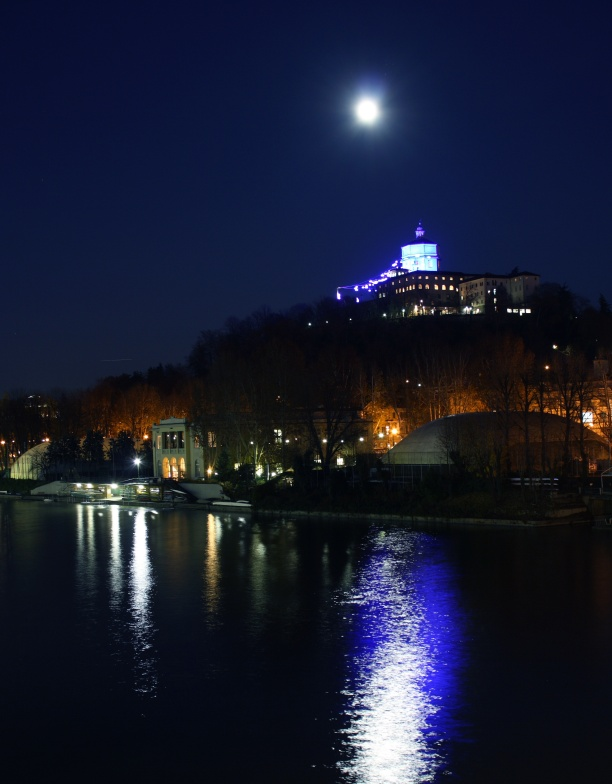

In [18]:
new_date = datetime.date(int('2010'),int('01'),int('01'))

# same process as above
data = {'api_key':'DEMO_KEY', 'date': new_date}
results =  requests.get('https://api.nasa.gov/planetary/apod',params=data)
dict_new_date = results.json()
Image(dict_new_date['url'])

# Use Case: Streaming API
In the prior use case, we covered REST APIs.  Now we are going to take a look at Streaming APIs. The main difference between these two types of APIs is the timing/revelance of the data being returned. A streaming API returns 'live' data. 

One of the easiest streaming API is Twitter.

## Twitter's streaming API
To fully reproduce this section of the FTE, you will need to obtain your own credentials from Twitter. You might have already done this for a prior MSDS class.  If so, you can reuse those credentials for this exercise.

To create a Twitter developer account, if you do not already have one, following these steps:

Go to https://developer.twitter.com/en/apps and log in with your Twitter user account.
* Click “Create an app”
* Fill out the form, and click “Create”
* A pop up window will appear for reviewing Developer Terms. Click the “Create” button again.
* In the next page, click on “Keys and Access Tokens” tab, and copy your “API key” and “API secret” from the Consumer API keys section.
* Scroll down to Access token & access token secret section and click “Create”. Then copy your “Access token” and “Access token secret”.

Once you have established you Twitter developer credentials, you will need to install the tweepy package.

### Specific number of 'live tweets'

<div class="alert alert-block alert-success">
<b>Installation:: tweepy</b> <br>
    pip install tweepy
</div>

In [2]:
import tweepy
import json

<div class="alert alert-block alert-danger">
<b>Important::</b> You can remove the following cell and use the commented out cell just below to load your Twitter credentials. The auth.csv will not be provided to you. Please notice that the individual credential fields are stored as strings.
</div>

In [3]:
### Remove or comment out this cell
import pandas as pd

# loading my specific credentials
data = pd.read_csv('auth.csv',header=0)

# setting up some variables for Twitter. 
consumer_key = data['consumer_key'][0]
consumer_secret = data['consumer_secret'][0]
access_token = data['access_token'][0]
access_token_secret = data['access_token_secret'][0]

FileNotFoundError: [Errno 2] File b'auth.csv' does not exist: b'auth.csv'

In [26]:
consumer_key = 'fcxfNISibidvpidEQac8oWvoQ'
consumer_secret = '2gDtvaHlYB550LSrO6UTNmUEK7ndrECWVVj60YzezoIvbV1wla'
access_token = '905700504277213185-6zc2RVM3rxKSQPFWRKTeK4NXMOKyaIY'
access_token_secret = 'M4H74NZuyWmMqdMHsbxRV5pZCoQCVkojAQpxoFzb4Wy6U'

Now that we have the individual user's credentials established and stored in variables, we can continue with setting up the connection to Twitter using tweepy.

Parameters that we will use:
* 'wait_on_rate_limit= True' will make the api to automatically wait for rate limits to replenish
* 'wait_on_rate_limit_notify= True' will make the api  to print a notification when Tweepyis waiting for rate limits to replenish

In [27]:
# setup for tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#API connection to Twitter
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [30]:
print(auth)
print(api)

In [28]:
for status in tweepy.Cursor(api.home_timeline).items(2):
    print('*** Tweet ***\n',status._json)

Time to go get a tweet. The following loop will allow us to gather a specific number of tweets. 

Since we didn't specific any restrictions on the types of tweets to gather, our output can include retweets, original posts, etc. for the user's credentials that are being used.

We can see in the above output that we got 2 tweets back. Which is good since we asked for 2 tweets to be returned. We can also see that the dates for these 2 tweet are recent. However, we still aren't "streaming" live data.

### Streaming of Twitter data

The first thing we will do is create a user defined listener class. (http://docs.tweepy.org/en/latest/streaming_how_to.html) 

For our example, we will only work with the on_status and on_error methods associated with tweepy's StreamListener class. 

More specifically, we will:
   * Create a listener that prints the text of any tweet that comes from out API (on_status method)
   * Handle errors the come from our API (on_error method)

Here is our very basic user defined StreamListener:

In [5]:
class StreamListener(tweepy.StreamListener):

    def on_status(self, status):
        print(status.text)
        
    def on_error(self, status_code):
        if status_code == 420:
            return False

Time to "open the gates" and start streaming data.  To make things a bit more interesting, let's filter our tweepy data to only consider tweets in English (languages=["en"]) and related to Google (track=["google"]).

<div class="alert alert-block alert-danger">
<b>Important::</b> You will have to kill the following cell at some point!  <i>This will run as long as you allow it to.</i>
</div>

In [6]:
stream_listener = StreamListener()
stream = tweepy.Stream(auth=api.auth, listener=stream_listener)

stream.filter(track=["google"],languages=["en"])

Shout out to another member of our inaugural board for @LiftOurVoicesUS the amazing @dianafalzone https://t.co/5d3dnFfcNk
Congrats to the Captains &amp; good luck to the team this season. #goBedfordBucs
RT @btsvotingteam: &lt; SEOUL MUSIC AWARDS &gt;

⏰ Dec 13 | 8:40 AM KST

#2 Main          — -78,729
#2 Kwave        — -31,630
#2 Popularity  — -2…
That’s true as shit

Signed, a Gemini
RT @NRA: ANTI-GUN #CALIFORNIA UPDATE: Between July and November, nearly one in every five of the 345k+ ammunition purchases in California w…
@BubblesVampire Google Wanda Sykes “it’s just Vick’s” and watch to@the end my friend. Made me think of you.
Horoscope 2020 App is available on both the stores Link below.
Android :- https://t.co/cPQ2V9txsU
IOS:-… https://t.co/bgbhxoNFoo
RT @YoungMoneySite: New @NICKIMINAJ interview with @billboard 📝 https://t.co/OQZNFK4x5A
From Discover on Google https://t.co/y5k9HP8Qea
Global Board Game and Card Game Market 2019 CMON, Indie Boards and Cards, The Walt ... https://t.c

RT @fshakir: 44 billionaires and counting for Biden, actually 

https://t.co/KGkS5vgRUe https://t.co/sZwOQUkatr
RT @BTSVotingFam: [SEOUL MUSIC AWARDS]

🚨Gap is increasing again! @BTS_twt is 2nd!

—The K-Wave and Popularity Awards are 100% based on vot…
@BradSherman Hi, I came up with a solution for Gun Control: https://t.co/n4MyMVVmyO Will you stand up to the NRA wi… https://t.co/3ZBZpuNrfW
RT @WWEXOL: [VOTE] Have you voted for EXO on the SMA app today?
Please follow the tutorial for more information on how to vote!
Let's Incre…
RT @ABSCBNNews: SB19 tops Google's most searched male personalities in PH https://t.co/UN6eykXfmE
RT @johnnybxxx: Only time you on the net is when you google my ass 🍑🤷🏻‍♂️ @NextDoorStudios #nextdoorstudios #nude #ass #muscle #gay #gaypor…
Just bought MOTSP on Google play again. I'll go to hmv this weekend and buy the physical too again.
RT @Pakistaniexols: [Seoul Music Award]

EXOL follow the tutorial and vote for EXO now!

Main: EXO 
Korean Pop: EXO 
Overseas 

RT @william_fitz: Lots of talk about McKinsey &amp; how corps work w/consultancies like them. I've a story that might be of interest. Sharing t…
@happiIynouis Noup, I haven’t either, I have just read the lyrics in google)?
RT @venusianbabie: Earth and air sign culture is having everything you say questioned by other people til they google it and realize you we…
RT @RighteousBabe4: Tweeto already banned from running charity. But gopigs think it’s insulting to say he shouldn’t grift via his office. h…
RT @everestpipkin: HEY ARTISTS and general people who are looking for creative opportunities --&gt;

i'm sharing what might be my life's work,…
RT @euphoriaHBO: thank YOU world!!

#EUPHORIA is one of the top trending tv shows this year on @Google. #YearInSearch https://t.co/HKzbilsz…
I get this sentiment but like... We all got smart phones. They already in your house, your car, your job, everywher… https://t.co/mqLil1nFIf
RT @btsvotingteam: &lt; SEOUL MUSIC AWARDS &gt;

⏰ Dec 13 | 8:40 AM K

RT @amber_athey: I asked @parscale today if the Trump campaign's digital strategy will change due to Twitter/Google's new restrictions on p…
#BREAKING:Listen to this--Now the #NSA says some of the data it collects from Americans is not being deleted FAST E… https://t.co/wOzQ7GDrDi
I’ll just have to google my own surgeries and perform them on myself at this rate
#latergram Ich liebe deutsches Essen. Danke Google! You can now use #GoogleAssistant on your phone to translate in… https://t.co/5QVx29czRN
RT @StrayKids_C9: [VOTE]

STAYs, have you voted for @Stray_Kids on IDOLPICK today? Let's increase the gap!

📍Voting ends on December 16
📍Yo…
RT @thegameawards: Here's a look at ALL the nominees for #TheGameAwards streaming live December 12th. 

Have your favorites? Vote now:

🗳️T…
RT @coolfunnytshirt: Dada is so humble.. just like us common people.. searches images from Google.. and uploads it without cropping.. https…
Two pieces by @mihirssharma. Do read.

India Is Abandoning Its Founding P

KeyboardInterrupt: 